In [1]:
import feather
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

In [2]:
train = feather.read_dataframe('../data/interim/train.ftr')
test = feather.read_dataframe('../data/interim/test.ftr')
train.shape, test.shape

((903653, 55), (804684, 53))

In [3]:
train['date'].head()

0    20160902
1    20160902
2    20160902
3    20160902
4    20160902
Name: date, dtype: int64

In [4]:
train['date'] = pd.to_datetime(train['date'], format='%Y%m%d')
test['date'] = pd.to_datetime(test['date'], format='%Y%m%d')

In [5]:
train['date'].head()

0   2016-09-02
1   2016-09-02
2   2016-09-02
3   2016-09-02
4   2016-09-02
Name: date, dtype: datetime64[ns]

### date と visitStartTimeは同じくタイムゾーンであるのか？  
https://www.kaggle.com/c/ga-customer-revenue-prediction/discussion/65691#387171

- visitStartTimeとdateがずれているように見える

In [71]:
pd.concat([pd.to_datetime(train['visitStartTime'], unit='s'), train['date']], axis=1).head()

,visitStartTime,date
0,2016-09-02 15:33:05,2016-09-02
1,2016-09-03 05:22:27,2016-09-02
2,2016-09-03 01:16:26,2016-09-02
3,2016-09-03 05:40:13,2016-09-02
4,2016-09-02 13:23:20,2016-09-02


- 時差の異なる国をいくつかピックアップ
- どの国も、visitStartTimeとのdiffの最大・最小が同じ
    - もし、dateがlocal timeの切り捨てであるならば、diffの最大最小はUTCとlocalの差に依存
- diffのヒストグラムが異なるのはなぜ？

min diff: 0 days 07:00:00
max diff: 1 days 07:59:41


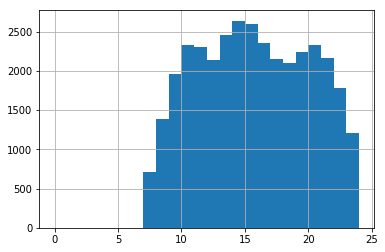

In [72]:
tmp = train[train['geoNetwork.country']=='United Kingdom']
diff = pd.to_datetime(tmp['visitStartTime'], unit='s') - pd.to_datetime(tmp['date'])
print("min diff:", diff.min())
print("max diff:", diff.max())
diff.apply(lambda x: x.days*24 + x.seconds / 3600).hist(bins=np.arange(0, 25, 1))

min diff: 0 days 07:00:00
max diff: 1 days 07:59:38


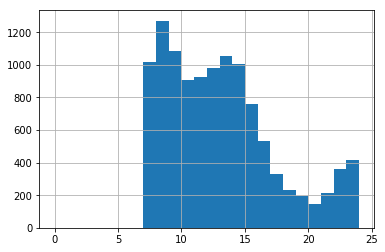

In [73]:
tmp = train[train['geoNetwork.country']=='Japan']
diff = pd.to_datetime(tmp['visitStartTime'], unit='s') - pd.to_datetime(tmp['date'])
print("min diff:", diff.min())
print("max diff:", diff.max())
diff.apply(lambda x: x.days*24 + x.seconds / 3600).hist(bins=np.arange(0, 25, 1))

min diff: 0 days 07:00:00
max diff: 1 days 07:59:55


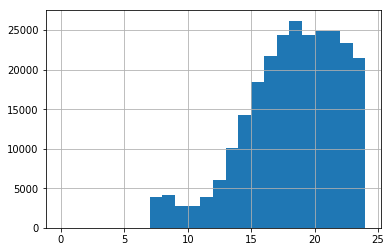

In [74]:
tmp = train[train['geoNetwork.country']=='United States']
diff = pd.to_datetime(tmp['visitStartTime'], unit='s') - pd.to_datetime(tmp['date'])
print("min diff:", diff.min())
print("max diff:", diff.max())
diff.apply(lambda x: x.days*24 + x.seconds / 3600).hist(bins=np.arange(0, 25, 1))

In [ ]:
train.groupby('fullVisitorId')